# Enron Project

## Task 1: feature selection

In [97]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

features_list_financial = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
                           'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
                           'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
                           'director_fees']

features_list_email = ['to_messages', 'from_poi_to_this_person', 'from_messages', 
                       'from_this_person_to_poi', 'shared_receipt_with_poi']

features_list_all = ['poi']
features_list_all.extend(features_list_financial)
features_list_all.extend(features_list_email)

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Analyze Data
###
### simple infos about data
print "Number of persons in data set:", len(data_dict.keys())
print "Number of features for each person:", len(data_dict["TOTAL"].keys())
print "Number of persons of interest in data set (POI):", sum(data_dict[pers]["poi"] for pers in data_dict.keys())
print "POI information missing for persons:", sum(data_dict[pers]["poi"]=="NaN" for pers in data_dict.keys())

### calulate # of missing values
features_missing_financial = {}
features_missing_financial_poi = {}
for feat in features_list_financial:
    features_missing_financial[feat] = 0
    features_missing_financial_poi[feat] = 0
    for pers in data_dict.keys():
        if data_dict[pers][feat] == "NaN":
            features_missing_financial[feat] += 1
            if data_dict[pers]["poi"] == 1:
                features_missing_financial_poi[feat] += 1

features_missing_email = {}
features_missing_email_poi = {}
for feat in features_list_email:
    features_missing_email[feat] = 0
    features_missing_email_poi[feat] = 0
    for pers in data_dict.keys():
        if data_dict[pers][feat] == "NaN":
            features_missing_email[feat] += 1
            if data_dict[pers]["poi"] == 1:
                features_missing_email_poi[feat] += 1
            
print "\nMissing values analysis:"
print "\n        financial feature :  missing    relative   missing (from poi)"
for feat in features_list_financial:
    print ("%25s : %6d  %8.0f %% %10d" % (feat, features_missing_financial[feat], 
                                     100.*features_missing_financial[feat]/len(data_dict.keys()),
                                     features_missing_financial_poi[feat]))
print "\n            email feature :  missing    relative   missing (from poi)"
for feat in features_list_email:
    print ("%25s : %6d  %8.0f %% %10d" % (feat, features_missing_email[feat], 
                                          100.*features_missing_email[feat]/len(data_dict.keys()),
                                          features_missing_email_poi[feat]))


Number of persons in data set: 146
Number of features for each person: 21
Number of persons of interest in data set (POI): 18
POI information missing for persons: 0

Missing values analysis:

        financial feature :  missing    relative   missing (from poi)
                   salary :     51        35 %          1
        deferral_payments :    107        73 %         13
           total_payments :     21        14 %          0
            loan_advances :    142        97 %         17
                    bonus :     64        44 %          2
restricted_stock_deferred :    128        88 %         18
          deferred_income :     97        66 %          7
        total_stock_value :     20        14 %          0
                 expenses :     51        35 %          0
  exercised_stock_options :     44        30 %          6
                    other :     53        36 %          0
      long_term_incentive :     80        55 %          6
         restricted_stock :     36        

## Task 2: remove outliers

### Histogram for all features ###
poi


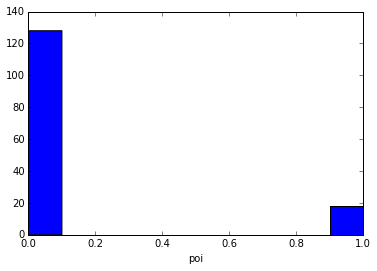

salary


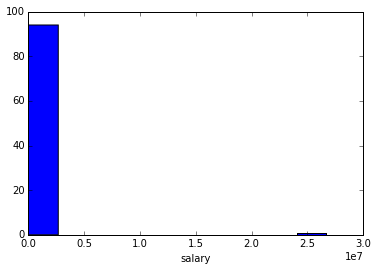

deferral_payments


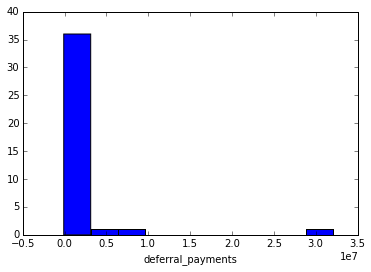

total_payments


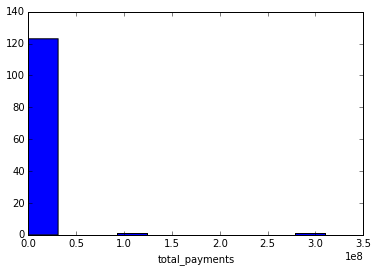

loan_advances


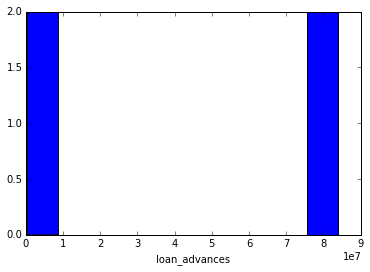

bonus


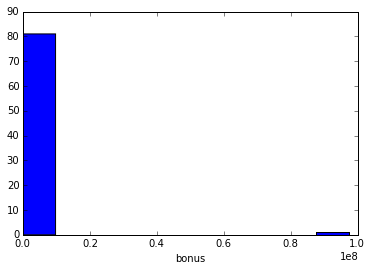

restricted_stock_deferred


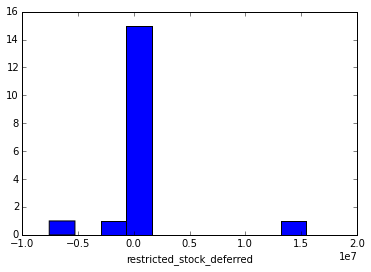

deferred_income


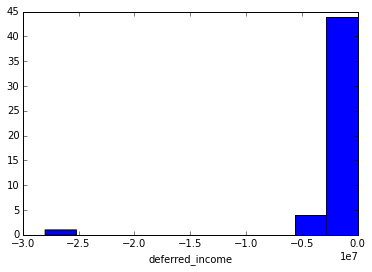

total_stock_value


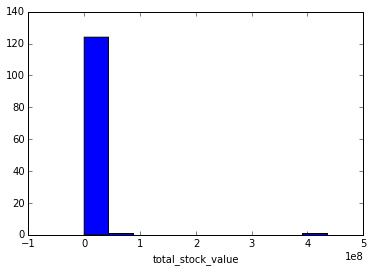

expenses


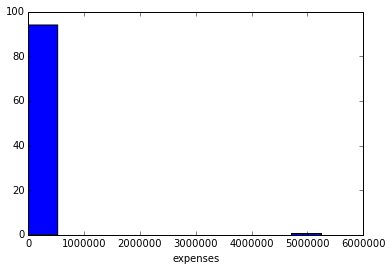

exercised_stock_options


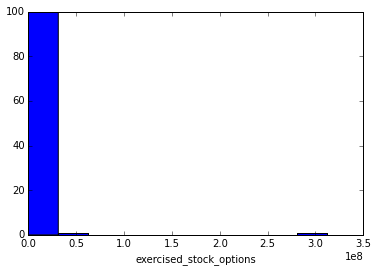

other


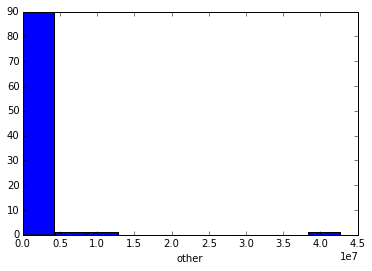

long_term_incentive


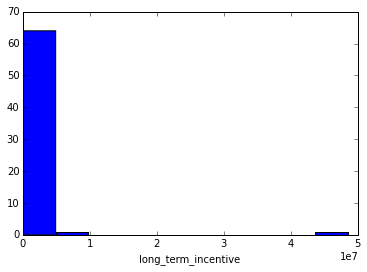

restricted_stock


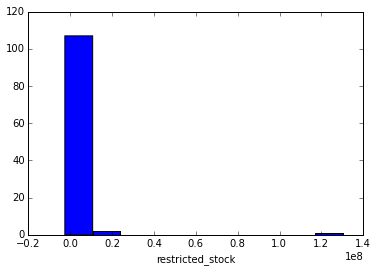

director_fees


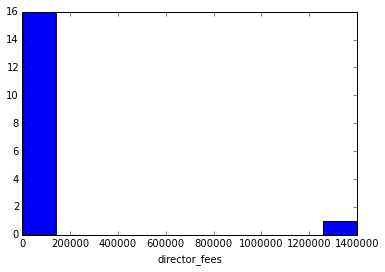

to_messages


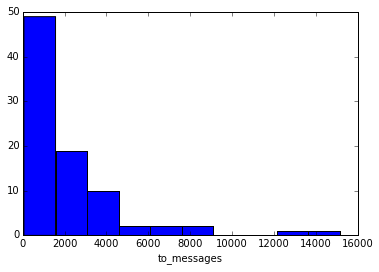

from_poi_to_this_person


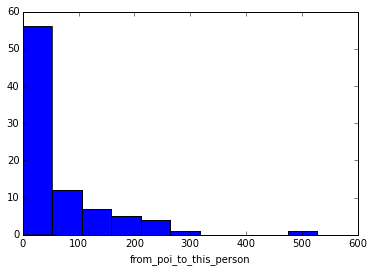

from_messages


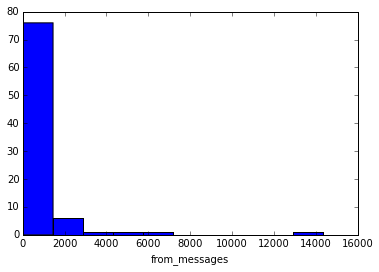

from_this_person_to_poi


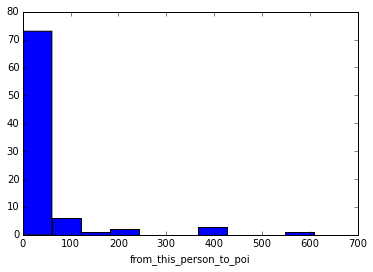

shared_receipt_with_poi


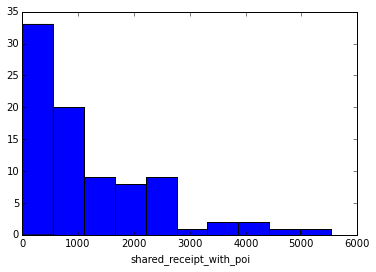

Maximum total_payments ( 309886585 ) for person  TOTAL

### Histogram for all features (after TOTAL removal) ###
poi


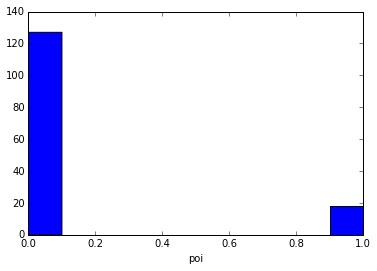

salary


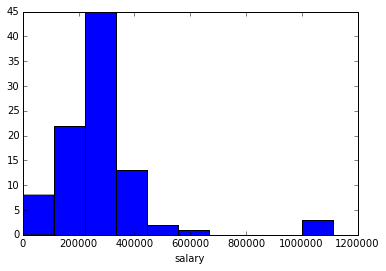

deferral_payments


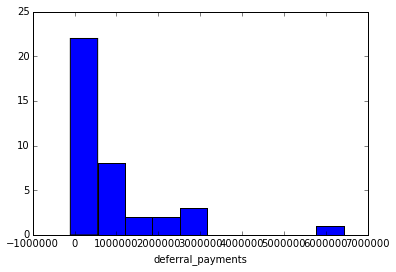

total_payments


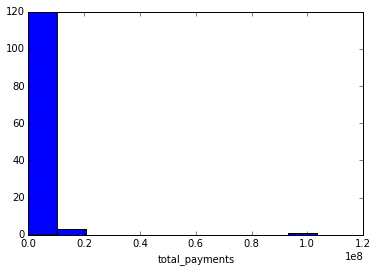

loan_advances


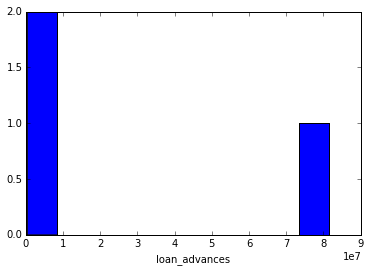

bonus


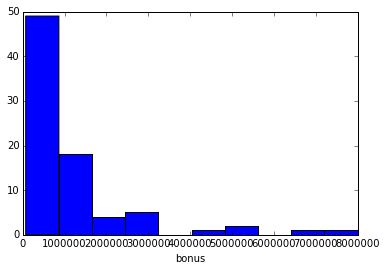

restricted_stock_deferred


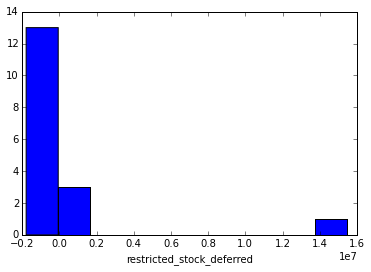

deferred_income


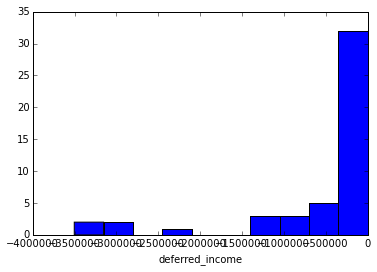

total_stock_value


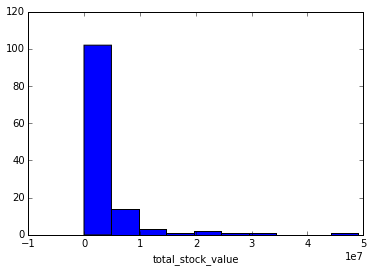

expenses


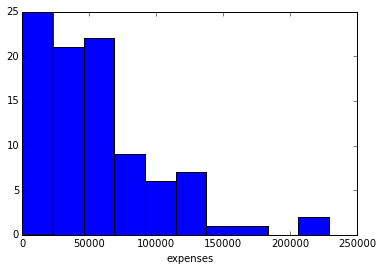

exercised_stock_options


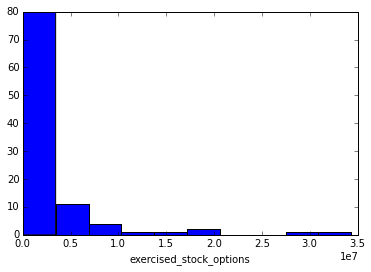

other


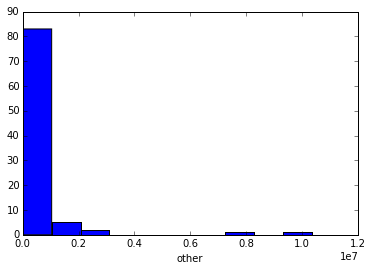

long_term_incentive


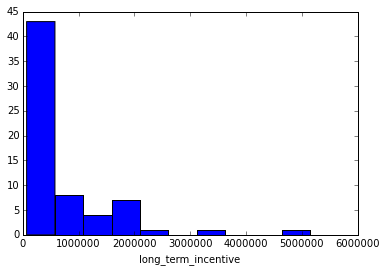

restricted_stock


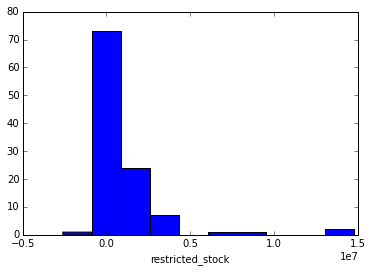

director_fees


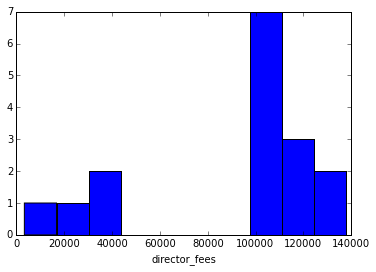

to_messages


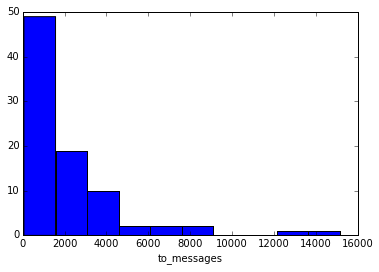

from_poi_to_this_person


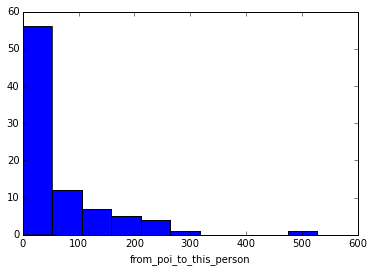

from_messages


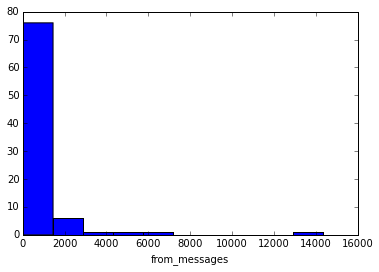

from_this_person_to_poi


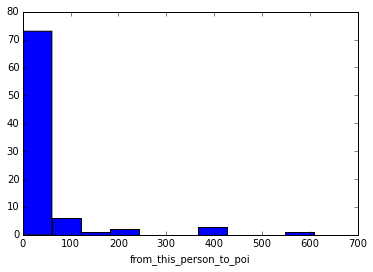

shared_receipt_with_poi


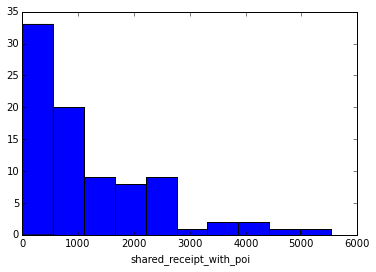

Maximum total_payments ( 103559793 ) for person  LAY KENNETH L
Maximum from_messages ( 14368 ) for person  KAMINSKI WINCENTY J


In [98]:
### Task 2: Remove outliers

import matplotlib.pyplot as plt
%matplotlib inline
see_plots=True

### plot histograms for all features
print "### Histogram for all features ###"
for feat in features_list_all:
    print feat
    val = []
    for pers in data_dict.keys():
        v = data_dict[pers][feat]
        if v <> "NaN":
            val.append(v)

    plt.hist(val)
    plt.xlabel(feat)
    if (see_plots):
        plt.show()
    else:
        plt.show(block=see_plots)

### total_payments has a single outlier far out, see what this is
total_payments = []
for pers in data_dict.keys():
    if data_dict[pers]["total_payments"] <> "NaN":
        total_payments.append(data_dict[pers]["total_payments"])
for pers in data_dict.keys():
    if data_dict[pers]["total_payments"] == max(total_payments):
        print "Maximum total_payments (", max(total_payments), ") for person ", pers
    
### remove person TOTAL (failure from pdf extraction)
data_dict.pop("TOTAL", 0)

### plot histograms for all features (again)
print "\n### Histogram for all features (after TOTAL removal) ###"
for feat in features_list_all:
    print feat
    val = []
    for pers in data_dict.keys():
        v = data_dict[pers][feat]
        if v <> "NaN":
            val.append(v)

    plt.hist(val)
    plt.xlabel(feat)
    if (see_plots):
        plt.show()
    else:
        plt.show(block=see_plots)

if not see_plots:
    plt.show()

### total_payments still has a single outlier far out, see what this is
total_payments = []
for pers in data_dict.keys():
    if data_dict[pers]["total_payments"] <> "NaN":
        total_payments.append(data_dict[pers]["total_payments"])
for pers in data_dict.keys():
    if data_dict[pers]["total_payments"] == max(total_payments):
        print "Maximum total_payments (", max(total_payments), ") for person ", pers

from_messages = []
for pers in data_dict.keys():
    if data_dict[pers]["from_messages"] <> "NaN":
        from_messages.append(data_dict[pers]["from_messages"])
for pers in data_dict.keys():
    if data_dict[pers]["from_messages"] == max(from_messages):
        print "Maximum from_messages (", max(from_messages), ") for person ", pers

### both cases are real persons, so keep them

## Task 3: create new features

In [99]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.

my_dataset = data_dict

# Add relative values for poi email contacts
for pers in my_dataset:
    values = my_dataset[pers]
    if values['to_messages'] <> "NaN":
        if values['to_messages'] == 0:
            to_poi_rel = 0
        else:
            to_poi_rel = float(values['from_this_person_to_poi']) / values['to_messages']
        if values['from_messages'] == 0:
            from_poi_rel = 0
            shared_poi_rel = 0
        else:
            from_poi_rel = float(values['from_poi_to_this_person']) / values['from_messages']
            shared_poi_rel = float(values['shared_receipt_with_poi']) / values['from_messages']
    else:
        to_poi_rel = "NaN"
        from_poi_rel = "NaN"
        shared_poi_rel = "NaN"
    values["to_poi_rel"] = to_poi_rel
    values["from_poi_rel"] = from_poi_rel
    values["shared_poi_rel"] = shared_poi_rel
    my_dataset[pers].update(values)

### add new features to features lists
features_list_new = ["to_poi_rel", "from_poi_rel", "shared_poi_rel"]
features_list_all_new = ['poi']
features_list_all_new.extend(features_list_financial)
features_list_all_new.extend(features_list_email)
features_list_all_new.extend(features_list_new)



Find best k features for feature list:
['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

k= 1 f1=0.1698
k= 2 f1=0.1876
k= 3 f1=0.2319
k= 4 f1=0.2504
k= 5 f1=0.2616
k= 6 f1=0.2693
k= 7 f1=0.2722
k= 8 f1=0.2722
k= 9 f1=0.2709
k=10 f1=0.2697
k=11 f1=0.2698
k=12 f1=0.2693
k=13 f1=0.2664
k=14 f1=0.2650
k=15 f1=0.2656
k=16 f1=0.2658
k=17 f1=0.2651
k=18 f1=0.2643
k=19 f1=0.2647


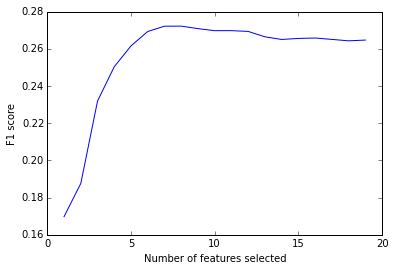


Best value for k= 8

                  feature  sel    score  pvalue
                   salary   +    4.85799 0.02955
        deferral_payments   -    0.09552 0.75785
           total_payments   -    0.09993 0.75250
            loan_advances   -    0.19121 0.66275
                    bonus   +    5.02280 0.02697
restricted_stock_deferred   -    0.09973 0.75273
          deferred_income   +   13.00019 0.00046
        total_stock_value   +    9.01593 0.00330
                 expenses   +    6.79792 0.01036
  exercised_stock_options   +   10.75392 0.00138
                    other   -    0.04579 0.83094
      long_term_incentive   +    2.12291 0.14788
         restricted_stock   -    0.58361 0.44649
            director_fees   -    1.56490 0.21353
              to_messages   -    0.12577 0.72352
  from_poi_to_this_person   -    1.02540 0.31340
            from_messages   -    0.74611 0.38954
  from_this_person_to_poi   -    0.06214 0.80359
  shared_receipt_with_poi   +    3.74148 0.05558

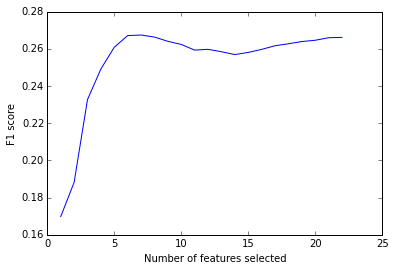


Best value for k= 7

                  feature  sel    score  pvalue
                   salary   +    4.85799 0.02955
        deferral_payments   -    0.09552 0.75785
           total_payments   -    0.09993 0.75250
            loan_advances   -    0.19121 0.66275
                    bonus   +    5.02280 0.02697
restricted_stock_deferred   -    0.09973 0.75273
          deferred_income   +   13.00019 0.00046
        total_stock_value   +    9.01593 0.00330
                 expenses   +    6.79792 0.01036
  exercised_stock_options   +   10.75392 0.00138
                    other   -    0.04579 0.83094
      long_term_incentive   -    2.12291 0.14788
         restricted_stock   -    0.58361 0.44649
            director_fees   -    1.56490 0.21353
              to_messages   -    0.12577 0.72352
  from_poi_to_this_person   -    1.02540 0.31340
            from_messages   -    0.74611 0.38954
  from_this_person_to_poi   -    0.06214 0.80359
  shared_receipt_with_poi   -    3.74148 0.05558

In [141]:
### select features based on univariate regression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.cross_validation import StratifiedShuffleSplit

import matplotlib.pyplot as plt
%matplotlib inline


def get_features_list (features_list):

    print "\nFind best k features for feature list:"
    print features_list
    print
    
    # prepare dataset for tests
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    strat_split = StratifiedShuffleSplit(labels, n_iter=100, test_size=0.2, random_state=42)

    best_f1 = 0
    f1_score_list = []

# loop to find best value of k for SelectKBest
    f1_list = []
    for k in range(1,len(features_list)):

        for train_idx, test_idx in strat_split: 
            features_train = []
            features_test  = []
            labels_train   = []
            labels_test    = []
            for ii in train_idx:
                features_train.append( features[ii] )
                labels_train.append( labels[ii] )
            for jj in test_idx:
                features_test.append( features[jj] )
                labels_test.append( labels[jj] )

            sel = SelectKBest(f_regression, k)
            features_train_sel = sel.fit_transform(features_train, labels_train)
            features_test_sel = sel.transform(features_test)

            clf_dt = DecisionTreeClassifier(random_state=42)
            clf_dt.fit(features_train_sel, labels_train)
            pred = clf_dt.predict(features_test_sel)

            f1_list.append(f1_score(labels_test, pred))

        f1 = sum(f1_list)/len(f1_list)
        f1_score_list.append(f1)
        print ("k=%2d f1=%6.4f" % (k, f1))
        if (f1 > best_f1):
            best_f1 = f1
            best_k = k
            best_sel = sel

# plot f1 values
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("F1 score")
    plt.plot(range(1,len(features_list)), f1_score_list)
    plt.show()

    print "\nBest value for k=", best_k

# list of scores and pvalues
    print
    print "                  feature  sel    score  pvalue"
    sup = best_sel.get_support()
    for i in range(len(sup)):
        if sup[i]:
            inout='+'
        else:
            inout='-'
        print ("%25s   %1s %10.5f %6.5f" % (features_list[i+1], inout, best_sel.scores_[i], best_sel.pvalues_[i]))
    
# build new features_list
    features_list_reg = ['poi']
    for i in range(len(sel.scores_)):
        if sup[i]:
            features_list_reg.append(features_list[i+1])
        
    print "\nRegression features list:\n", features_list_reg
    return features_list_reg

features_list_reg = get_features_list (features_list_all)
features_list_reg_new = get_features_list (features_list_all_new)

print "\n================================"
print "\nAll features:"
print features_list_all
print "\nFeatures from regression:"
print features_list_reg
print "\nFeatures from regression (with new features):"
print features_list_reg_new

## Task 4: classification

In [144]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

from time import time
from tester import test_classifier

### try decision tree with all 3 feature lists

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
start_time = time()
test_classifier(clf_dt, my_dataset, features_list_all, folds = 200)
print ("Runtime for Decision Tree (all features): %4.2f sec" % (time()-start_time))
print

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
start_time = time()
test_classifier(clf_dt, my_dataset, features_list_reg, folds = 200)
print ("Runtime for Decision Tree (regression features): %4.2f sec" % (time()-start_time))
print

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
start_time = time()
test_classifier(clf_dt, my_dataset, features_list_reg_new, folds = 200)
print ("Runtime for Decision Tree (regression+added features): %4.2f sec" % (time()-start_time))
print

### features list from regression test gives best performance, so select this list for further tests
features_list = features_list_reg_new

### try random forest

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
start_time = time()
test_classifier(clf_rf, my_dataset, features_list, folds = 200)
print("Runtime for Random Forest: %4.2f sec" % (time()-start_time))
print

### try adaboost

from sklearn.ensemble import AdaBoostClassifier
clf_ab = AdaBoostClassifier(random_state=42)
start_time = time()
test_classifier(clf_ab, my_dataset, features_list, folds = 200)
print("Runtime for Adaboost: %4.2f sec" % (time()-start_time))
print

### add feature reduction (PCA)

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

n_components = 4

### try decision tree with PCA

estimators = [('reduce_dim', PCA(n_components=n_components)), ('dt', DecisionTreeClassifier(random_state=42))]
clf_dt_pca = Pipeline(estimators)
start_time = time()
test_classifier(clf_dt_pca, my_dataset, features_list, folds = 200)
print("Runtime for Decision Tree (with PCA): %4.2f sec" % (time()-start_time))
print

### try random forest with PCA

estimators = [('reduce_dim', PCA(n_components=n_components)), ('rf', RandomForestClassifier(random_state=42))]
clf_rf_pca = Pipeline(estimators)
start_time = time()
test_classifier(clf_rf_pca, my_dataset, features_list, folds = 200)
print("Runtime for Random Forest (with PCA): %4.2f sec" % (time()-start_time))
print

### try adaboost with PCA

estimators = [('reduce_dim', PCA(n_components=n_components)), ('ab', AdaBoostClassifier(random_state=42))]
clf_ab_pca = Pipeline(estimators)
start_time = time()
test_classifier(clf_ab_pca, my_dataset, features_list, folds = 200)
print("Runtime for AdaBoost (with PCA): %4.2f sec" % (time()-start_time))
print


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=42, splitter='best')
	Accuracy: 0.80600	Precision: 0.26425	Recall: 0.25500	F1: 0.25954	F2: 0.25680
	Total predictions: 3000	True positives:  102	False positives:  284	False negatives:  298	True negatives: 2316

Runtime for Decision Tree (all features): 0.17 sec

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=42, splitter='best')
	Accuracy: 0.81200	Precision: 0.28534	Recall: 0.27250	F1: 0.27877	F2: 0.27497
	Total predictions: 3000	True positives:  109	False positives:  273	False negatives:  291	True negatives: 2327

Runtime for Decision Tree (regression features): 0.13 

## Task 5: tune classifier

In [145]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit

### prepare for cross validation testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
strat_split = StratifiedShuffleSplit(labels, 200, random_state=42)

### tune the decision tree
start_time = time()
dt_params = {"class_weight": [None, "auto"], "criterion": ["gini", "entropy"], 
             "splitter": ["best", "random"], "max_depth": [None, 3, 5] }
clf_dt_tuner = GridSearchCV(clf_dt, dt_params, scoring="f1", cv=strat_split)
clf_dt_tuner = clf_dt_tuner.fit(features, labels)
clf_dt_tuned = clf_dt_tuner.best_estimator_
test_classifier(clf_dt_tuned, my_dataset, features_list, folds = 200)

print("\nRuntime for tuning of Decision Tree: %4.2f sec\n" % (time()-start_time))

### just for comparison, also tune random forest
start_time = time()
rf_params = {"max_features": range(3,len(features_list),4), "n_estimators": range(10, 110, 30)}
clf_rf_tuner = GridSearchCV(clf_rf, rf_params, scoring="f1", cv=strat_split)
clf_rf_tuner = clf_rf_tuner.fit(features, labels)
clf_rf_tuned = clf_rf_tuner.best_estimator_
test_classifier(clf_rf_tuned, my_dataset, features_list, folds = 200)

print("\nRuntime for tuning of Random Forest: %4.2f sec\n" % (time()-start_time))

### decision tree gives better result. try to improve with PCA
start_time = time()
dt_pca_params = {"reduce_dim__n_components": range(1,len(features_list)), "dt__class_weight": [None, "auto"],
                 "dt__criterion": ["gini", "entropy"], "dt__splitter": ["best", "random"],
                 "dt__max_depth": [None, 3, 5] }
clf_dt_pca_tuner = GridSearchCV(clf_dt_pca, dt_pca_params, scoring="f1", cv=strat_split)
clf_dt_pca_tuner = clf_dt_pca_tuner.fit(features, labels)
clf_dt_pca_tuned = clf_dt_pca_tuner.best_estimator_
test_classifier(clf_dt_pca_tuned, my_dataset, features_list, folds = 200)

print("Runtime for tuning of Decision Tree (with PCA): %4.2f sec\n" % (time()-start_time))

# tunded decision tree without pca gives best results, so choose it
clf = clf_dt_pca_tuned


DecisionTreeClassifier(class_weight='auto', criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=42, splitter='best')
	Accuracy: 0.72400	Precision: 0.29102	Recall: 0.74500	F1: 0.41854	F2: 0.56784
	Total predictions: 3000	True positives:  298	False positives:  726	False negatives:  102	True negatives: 1874


Runtime for tuning of Decision Tree: 6.02 sec

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
	Accuracy: 0.85833	Precision: 0.43719	Recall: 0.21750	F1: 0.29048	F2: 0.24180
	Total predictions: 3000	True positives:   87	False positives:  112	False negatives:  

## Task 6: dump results

In [146]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)